### Decision Tree and Random Forest

In case of Titanic, we need to Predict, who survived and who died.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?



In [2]:
from pyforest import * 

In [1]:
train = pd.read_csv("train.csv")

In [3]:
test = pd.read_csv("test.csv")

In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 01 Model - Every one Died -0.62

### End to End Modelling Process

1. Hypothesis around the Dataset

#### EDA

1. Univariate Analysis

2. Bivariate Analysis

3. Missing Values and their imputation

4. Outlier Treatment

5. Feature Engineering

6. Data Pre_Processing Step - Applying Normalization/Standardization


# Lets Perform EDA

1. if the col is binary - make a count plot else if it is numerical then we create Histogram. 

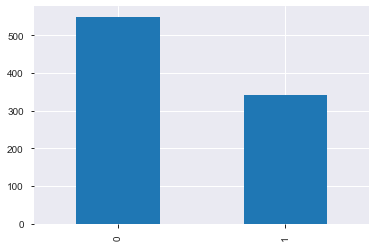

In [7]:
# Unvariate Analysis
train.Survived.value_counts().plot(kind = "bar")
plt.show()

In [8]:
train.Survived.value_counts()[0]/train.shape[0]

0.6161616161616161

In [9]:
pd.DataFrame(train.groupby("Sex")["Survived"].value_counts()).T

# Females Have better Survival Chance than Males

Sex      female     male     
Survived      1   0    0    1
Survived    233  81  468  109

### 02nd Model - All Females Survived

In [10]:
def nayadaur(x):
    if(x=="female"):
        return(1)
    else:
        return(0)

In [11]:
#test.Sex.apply(nayadaur)

In [12]:
# Preparing the Data for Kaggle Submission
solution = pd.DataFrame({"PassengerId":test.PassengerId,
                        "Survived":test.Sex.apply(nayadaur)})

In [13]:
# Export to csv
solution.to_csv("Female Survived.csv", index = False)

In [14]:
cd

C:\Users\HP


In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


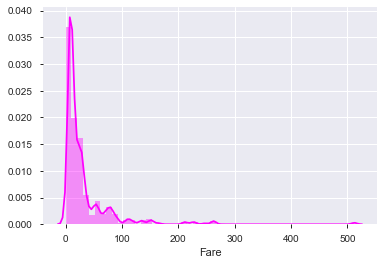

In [16]:
# Fare
sns.distplot(train.Fare, color = "magenta")

In [17]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

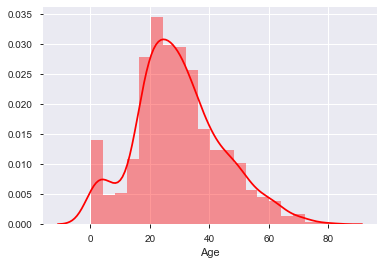

In [18]:
sns.distplot(train.Age.dropna(), color = "red")
# Age has missing Values

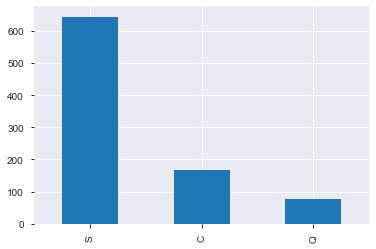

In [19]:
# Embarked
train.Embarked.value_counts().plot(kind="bar")

# Majority of the People Embarked from South Hampton.

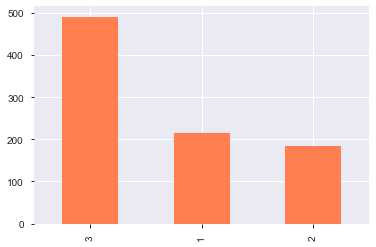

In [20]:
# P Class
train.Pclass.value_counts().plot(kind = "bar", color = "coral")

# Majoirty Passengers on the Board of Titanic are 03rd Class Passengers...

In [21]:
# Missing Values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
train.SibSp.value_counts()
# In SIBSP, Singles count is higher...

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [23]:
train.Parch.value_counts()

# Singles appeared in PARCH which should not be there...

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

### Univariate Analysis: Findings

1. Singles appearing in PARCH Which should be 1 miniumum.

2. Missing Values found in Age and Cabin

3. Majoirty Passengers on the Board of Titanic are 03rd Class Passengers...

4. More Female Survival Pattern Observed.

5. Majority of the People Embarked from South Hampton.

6. Fare and Age appears to be skewed where the Min Fare is 0 Dollars and Max Fare is 512 Dollars with the Average Fare Paid is 33 Dollars.

### Bivariate Analysis

1. Num Vs Num - Scatter Plot

2. Cat vs Numerical - Boxplot

3. Cat Vs Cat - frequency table

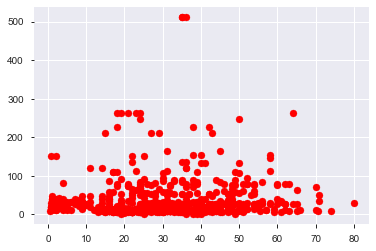

In [24]:
# Scatterplot
plt.scatter(train.Age, train.Fare, color = "red")

# No Pattern Realised

In [25]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

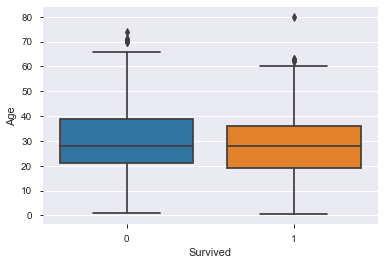

In [26]:
sns.boxplot(x = "Survived", y = "Age", data = train)

## 03 Model- Decision Tree

In [27]:
pd.DataFrame(train.groupby("Survived")["Age"].describe())

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


In [28]:
pd.DataFrame(train.groupby("Survived")["Fare"].describe())

# Exploring 0 Fare in reference to Names and their Titles

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


In [29]:
# Missing Values - Combining Train and Test
combined = pd.concat([train, test], ignore_index = True, 
                     sort = False)


In [30]:
combined.shape

(1309, 12)

In [31]:
combined.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [32]:
# Embarked
combined[pd.isnull(combined.Embarked)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [33]:
combined[(combined.Pclass==1) & (combined.Survived==1) & (combined.Sex=="female")]["Embarked"].value_counts()

S    46
C    42
Q     1
Name: Embarked, dtype: int64

In [34]:
combined.Embarked.fillna("S", inplace = True) # fill Na

In [35]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Survived     418
Age          263
Fare           1
Cabin       1014
dtype: int64

In [36]:
combined[combined.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [37]:
combined[combined.Name=="Storey, Mr. Thomas"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [38]:
# Male, 3, S
combined[(combined.Sex=="male") & (combined.Pclass==3) & (combined.Embarked=="S")]["Fare"].describe()

count    365.000000
mean      13.145977
std       12.554548
min        0.000000
25%        7.795800
50%        8.050000
75%        9.845800
max       69.550000
Name: Fare, dtype: float64

In [39]:
combined.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [40]:
combined.Age.fillna(28, inplace = True)

In [41]:
combined.Fare.fillna(8.05,inplace = True)

In [42]:
# Split the Data in train and Test
train.shape

(891, 12)

In [43]:
newtrain = combined.loc[0:890, :]

In [44]:
newtest = combined.loc[891:combined.shape[0], :]

In [45]:
input_train = newtrain.drop(["PassengerId", "Name", 
                             "Ticket", "Cabin"], axis = 1)

In [46]:
input_test = newtest.drop(['PassengerId', "Name", 'Survived', 
                           'Ticket','Cabin'],
                         axis = 1)

In [47]:
dummytrain = pd.get_dummies(input_train)

In [48]:
dummytest = pd.get_dummies(input_test)

In [49]:
xtrain = dummytrain.drop("Survived", axis = 1)
ytrain = dummytrain.Survived

In [50]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [51]:
pred = dtree.fit(xtrain,ytrain).predict(dummytest)

In [52]:
ytrain.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [53]:
# Preparing the Data for Kaggle Submission
solution = pd.DataFrame({"PassengerId":test.PassengerId,
                        "Survived":pred})
solution.to_csv("DTREE.csv", index = False)

In [54]:
cd

C:\Users\HP


## 04 Model- Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [56]:
rf.fit(xtrain,ytrain)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
pred = rf.predict(dummytest)

In [58]:
# Preparing the Data for Kaggle Submission
solution = pd.DataFrame({"PassengerId":test.PassengerId,
                        "Survived":pred})
solution.to_csv("RF.csv", index = False)

In [59]:
dummytrain.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1.0,1,38.0,1,0,71.2833,1,0,1,0,0
2,1.0,3,26.0,0,0,7.9250,1,0,0,0,1
3,1.0,1,35.0,1,0,53.1000,1,0,0,0,1
4,0.0,3,35.0,0,0,8.0500,0,1,0,0,1


In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [61]:
xtrain = pd.DataFrame(sc.fit_transform(xtrain),columns = xtrain.columns)

In [62]:
xtest = pd.DataFrame(sc.transform(dummytest),columns = dummytest.columns)

In [63]:
pred = dtree.fit(xtrain, ytrain).predict(xtest)

In [64]:
# Preparing the Data for Kaggle Submission
solution = pd.DataFrame({"PassengerId":test.PassengerId,
                        "Survived":pred})
solution.to_csv("DTREE SCALED.csv", index = False)

Note - Data is Combined and Fare & Embarked is Imputed

In [65]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Survived     418
Cabin       1014
dtype: int64

In [66]:
combined.groupby("Survived")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0.0,549.0,30.028233,12.499986,1.00,23.0,28.0,35.0,74.0
1.0,342.0,28.291433,13.764425,0.42,21.0,28.0,35.0,80.0


### Feature Engineering

FE is a process in ML that helps in extracting new columns, transforming existing columns so that the Machine is able to capture pattern very easily.

In [67]:
titles = []
for i in combined.Name:
    titles.append(i.split()[1][:-1])

In [69]:
combined.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [73]:
combined["Titles"] = pd.DataFrame(titles)

In [74]:
firstname = combined.Name.transform(lambda x:x.split(", ")[1])

In [75]:
newtitles = firstname.transform(lambda x:x.split(". ")[0])

In [76]:
pd.DataFrame(newtitles)["Name"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [77]:
# Mr, Mrs, Miss, Master, Ms, Others
combined["Titles"] = pd.Series(newtitles)

In [78]:
combined.Titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [79]:
titles_ignore = ['Don', 'Rev', 'Dr', 'Mme',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona']

In [80]:
def title_function(x):
    if(x in titles_ignore):
        return("Others")
    else:
        return(x)

In [81]:
combined["Titles"] = combined.Titles.apply(title_function)

In [82]:
combined.Titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others', 'Ms'], dtype=object)

In [83]:
combined.groupby("Titles")["Age"].describe().T

Titles,Master,Miss,Mr,Mrs,Ms,Others
count,61.000000,260.000000,757.000000,197.000000,2.0,32.000000
mean,8.435738,22.971500,31.263540,35.761421,28.0,42.656250
std,8.587634,11.274677,11.027933,12.375046,0.0,12.400857
min,0.330000,0.170000,11.000000,14.000000,28.0,23.000000
25%,2.000000,17.000000,25.000000,28.000000,28.0,31.500000
50%,6.000000,24.000000,28.000000,33.000000,28.0,44.500000
75%,11.000000,28.000000,35.000000,45.000000,28.0,52.250000
max,28.000000,63.000000,80.000000,76.000000,28.0,70.000000


In [84]:
combined.loc[(combined.Titles=="Master") & (combined.Age.isnull()), "Age"]=4.0

In [85]:
combined.loc[(combined.Titles=="Miss") & (combined.Age.isnull()), "Age"]=22.0

In [86]:
combined.loc[(combined.Titles=="Mr") & (combined.Age.isnull()), "Age"]=29.0

In [87]:
combined.loc[(combined.Titles=="Mrs") & (combined.Age.isnull()), "Age"]=35.5

In [88]:
combined.loc[(combined.Titles=="Ms") & (combined.Age.isnull()), "Age"]=28.0

In [89]:
combined.loc[(combined.Titles=="Others") & (combined.Age.isnull()), "Age"]=45.0

In [106]:
train.shape[0]-1

890

In [107]:
# Train and Test
newtrain = combined.loc[0:train.shape[0]-1, :]
newtest = combined.loc[891:combined.shape[0], :]

In [108]:
newtrain.drop(["PassengerId", "Name", 
               "Ticket", "Cabin"], axis = 1, inplace = True)

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [109]:
newtest.drop(["PassengerId", "Survived", "Name", 
              "Ticket", "Cabin"], axis = 1, inplace = True)

In [111]:
# Fixing the Survived Col
newtrain["Survived"]=newtrain.Survived.astype("int")

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [112]:
# OHE
dummytrain = pd.get_dummies(newtrain)
dummytest = pd.get_dummies(newtest)

In [113]:
x = dummytrain.drop("Survived", axis = 1)
y = dummytrain.Survived

## 05 Model- Decision Tree

In [114]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [115]:
pred = dtree.fit(x,y).predict(dummytest)

In [116]:
solution = pd.DataFrame({"PassengerId":test.PassengerId,
                        "Survived":pred})

In [117]:
solution.to_csv("DTREE MODEL NEW.csv",index = False) # 0.72248

In [118]:
cd

C:\Users\HP


## 06 Model- Random Forest

In [119]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [120]:
pred = rf.fit(x,y).predict(dummytest)
solution = pd.DataFrame({"PassengerId":test.PassengerId,
                        "Survived":pred})
solution.to_csv("RF MODEL NEW.csv",index = False) # 0.75119

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [121]:
dtree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [122]:
params = {"criterion":['gini', "entropy"], "max_depth":[2,3,4,5],
         "max_features":["auto", "sqrt", "log2"],
         "splitter":["best", "random"]} # ISLR by Springer Series

## 07 Model- Decision Tree (GridSearch CV)

In [128]:
# Prune the Decision Tree
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=dtree, param_grid=params, cv = 25)
# Cross Validation

In [129]:
grid.fit(x,y)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=25, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                        

In [130]:
grid.best_params_ # best parameters

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [131]:
dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth= 5,
                               max_features='sqrt', splitter='best')

In [132]:
pred =dtree.fit(x,y).predict(dummytest)
solution = pd.DataFrame({"PassengerId":test.PassengerId,
                        "Survived":pred})
solution.to_csv("TREE PRUNED.csv",index = False) # 0.77990 # 0.77511

In [133]:
x.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Titles_Master',
       'Titles_Miss', 'Titles_Mr', 'Titles_Mrs', 'Titles_Ms', 'Titles_Others'],
      dtype='object')

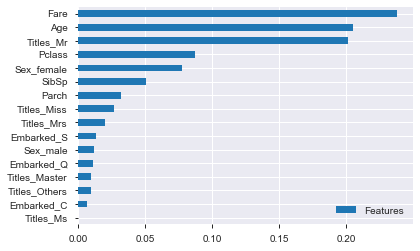

In [134]:
pd.DataFrame(rf.feature_importances_, index = dummytest.columns, 
             columns=["Features"]).sort_values(by="Features").plot(kind="barh")
plt.show()

## 08 Model- LogisticRegression

In [137]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [138]:
pred =lg.fit(x,y).predict(dummytest)
solution = pd.DataFrame({"PassengerId":test.PassengerId,
                        "Survived":pred})
solution.to_csv("LG.csv",index = False) # 0.78468

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 09 Model- GradientBoostingClassifier

In [139]:
# Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()

In [140]:
pred =gbm.fit(x,y).predict(dummytest)
solution = pd.DataFrame({"PassengerId":test.PassengerId,
                        "Survived":pred})
solution.to_csv("GBM.csv",index = False) # 0.77033

## 10 Model- KNeighborsClassifier

In [141]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [142]:
pred =knn.fit(x,y).predict(dummytest)
solution = pd.DataFrame({"PassengerId":test.PassengerId,
                        "Survived":pred})
solution.to_csv("KNN.csv",index = False) # 0.67942

## 11 Model-  Voting Classifier (Random Forest, Decision Tree, Gradient Boost, Logistic Regression)

In [143]:
# Ensemble Model - Voting Classifier
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[("tree", dtree), ("random", rf),
                                  ("gbm", gbm),("LG", lg)])

In [144]:
pred =vc.fit(x,y).predict(dummytest)
solution = pd.DataFrame({"PassengerId":test.PassengerId,
                        "Survived":pred})
solution.to_csv("NEWVotingModel.csv",index = False) # 0.79425

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [145]:
cd

C:\Users\HP
